### Пример 1.1.1
#### Пусть дана начальная популяция из четырех хромосом с двумя генами x и y. Показатель качества хромосомы оценивается функцией Z. При равном качестве хромосом предпочтение отдается хромосоме с большим номером. На каждом этапе хромосома a с высшим качеством порождает четыре новых хромосомы 𝑏𝑏1, 𝑐𝑐1, 𝑏𝑏2, 𝑐𝑐2, обмениваясь генами с двумя хромосомами b и c более низкого качества по указанной схеме:(схема)
#### Последняя хромоcома (с низшим качеством) выбывает из популяции. Найти максимальный показатель качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции.


In [1]:
#функция качества хромосомы
def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)

In [2]:
#сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

In [3]:
#Запрошраммируем схему обмена хромосами
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    
    X[0] = oldX[sortedId[0]]
    
    X[1] = oldX[sortedId[1]]
    
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    
    Y[2] = oldY[sortedId[0]]
    
    Y[3] = oldY[sortedId[1]]
    return X, Y

In [4]:
#Отсортируем массив качества наших потомков и выделим полученные индексы:
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    
    return sortedId

In [5]:
#Напишем функцию для шага эволюции:
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return X, Y, Z

In [6]:
#Произведем эволюционные изменения, в соответствие с задачей(4 шага):

#шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum = 4):
    results = []
    
    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        
        X, Y, Z = evoStep(X, Y, arrZ)
        
        X, Y = exchangeScheme(X, Y, sorting(Z))
        
        results.append([X, Y, qSumZ(arrZ), arrZ])
        
    return X, Y, results

In [7]:
#Объявление массивов хромосом
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

In [8]:
# Реализация алгоритма
results = evoSteps(X, Y)

In [9]:
#Теперь, выведем полученные значения для показателя качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции.
#Для этого, воспользуемся циклом по значениям переменной results.
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')
    
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    
print(f'max Z:     {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z:     1.0


### Задание
#### Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными. (8 вар)

In [11]:
#функция качества хромосомы
def qZ(x, y):
    return (x - 3 * y - 3) / (x ** 2 + 2 * y ** 2 + 1)

In [12]:
#сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

In [13]:
#Запрошраммируем схему обмена хромосами
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    
    X[0] = oldX[sortedId[0]]
    
    X[1] = oldX[sortedId[1]]
    
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    
    Y[2] = oldY[sortedId[0]]
    
    Y[3] = oldY[sortedId[1]]
    return X, Y

In [14]:
#Отсортируем массив качества наших потомков и выделим полученные индексы:
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    
    return sortedId

In [15]:
#Напишем функцию для шага эволюции:
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return X, Y, Z

In [16]:
#Произведем эволюционные изменения, в соответствие с задачей(4 шага):

#шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum = 4):
    results = []
    
    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        
        X, Y, Z = evoStep(X, Y, arrZ)
        
        X, Y = exchangeScheme(X, Y, sorting(Z))
        
        results.append([X, Y, qSumZ(arrZ), arrZ])
        
    return X, Y, results

In [17]:
#Объявление массивов хромосом
X = [-5, -3, -2, -1]
Y = [-1, -2, 0, 1]

In [18]:
# Реализация алгоритма
results = evoSteps(X, Y)

In [19]:
#Теперь, выведем полученные значения для показателя качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции.
#Для этого, воспользуемся циклом по значениям переменной results.
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')
    
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    
print(f'max Z:     {max(qualityArrZ)}')

max_1_step: -2.928571428571429
max_2_step: -0.8319004524886877
max_3_step: -0.2676147382029735
max_4_step: 0.09502262443438915
max Z:     0.07692307692307693


### Пример 1.2.1
#### Итак, начальные условия задачи представляют собой следующий граф с расстояниями между ребрами:

In [47]:
#импорт библиотеки:
import networkx as nx
from math import e

In [48]:
#Далее, опишем массив длин ребер, последовательности прохождение вершин на маршруте и их замены, значения P, а также начальную температуру:
distances = [(1, 2, 20),
            (1, 3, 40),
            (1, 4, 42),
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2, 4, 38),
            (2, 5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)] #длины ребер

V = [1, 4, 5, 2, 6, 3, 1]  #последовательность прохождения маршрута
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 2)] #последовательность замен вершин
P = [49, 54, 43, 54] #случайные числа, выпавшие в процессе счёта

T = 100 #начальная температура

In [49]:
#Запишем функции вероятности и изменения температуры:

#функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)

#функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT
    
    return nextT

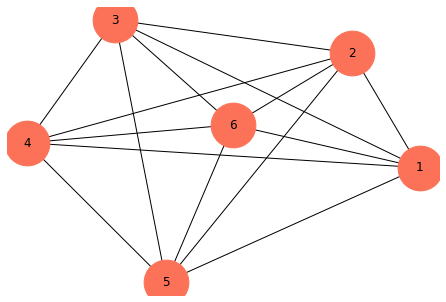

In [50]:
#Построим граф по заданным вершинам, как в начальном условии:

graph = nx.Graph() #создание пустого графа
graph.add_weighted_edges_from(distances) #добавление весов рёбер

#отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

In [51]:
#Теперь, напишем необходимые, согласно алгоритму выше, функции для работы метода имитации отжига. 
#Вычислим длину ребра:

def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) 
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [52]:
#Вычислим длину маршрута:

def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
        
    return sum(edges)

In [53]:
#Запишем функцию для однократной перестановки в пути:

#одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    
    return arrV

In [54]:
#А теперь функцию, для реализации непосредственно самой перестановки:

#перестановки в пути

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneRaplacement(V, z)
    return V

In [55]:
#Теперь, опишем алгоритм выбора подходящего пути методом отжига:

#выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) #нахождение длины пути
    arrSum = [sumLength] #массив сумм длин
    
    #циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) #новый маршрут после перестановки
        newS = routeLength(newV, distances) #длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength #разница между длиной нового и старого маршрутов
        
        #в случае, если разница между длинами больше 0, то вычисляем вероятность
        if deltaS > 0:
            p = probability(deltaS, T) #подсчет вероятности
            
            #если заданная вероятность попадает в интервал от 0 до p, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        
        T = reductTemp(T) #вычисление температуры
    
    return V, arrSum

In [56]:
#отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    
    graph = nx.Graph() #создание пустого графа
    
    
    graph.add_weighted_edges_from(newDistances) #добавление весов рёбер
    #отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color = '#e1eb26', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


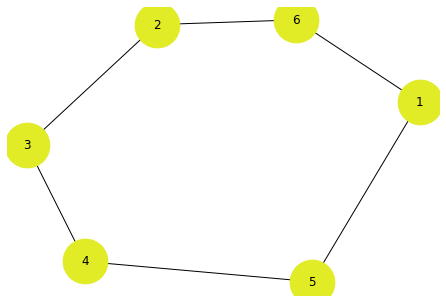

In [57]:
#И, наконец, рассчитаем наилучший маршрут и его длину:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) #отрисовка лучшего маршрута

### Задание
#### Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.
#### вар 8

In [1]:
import networkx as nx
from math import e

In [2]:
distances = [(1, 2, 19), 
             (1, 3, 39), 
             (1, 4, 35), 
             (1, 5, 26), 
             (1, 6, 18), 
             (2, 3, 26), 
             (2, 4, 33), 
             (2, 5, 37), 
             (2, 6, 14), 
             (3, 4, 22), 
             (3, 5, 41), 
             (3, 6, 21), 
             (4, 5, 22), 
             (4, 6, 19), 
             (5, 6, 24)]

V = [1, 4, 2, 3, 5, 6, 1]
Z = [(5, 2), 
     (4, 5), 
     (2, 3), 
     (3, 4)]
P = [88, 54, 24, 64]

T = 100

In [3]:
def probability(delta, T):
    return 100 * e ** (-delta / T)

def reductTemp(prevT):
    nextT = 0.5 * prevT
    
    return nextT

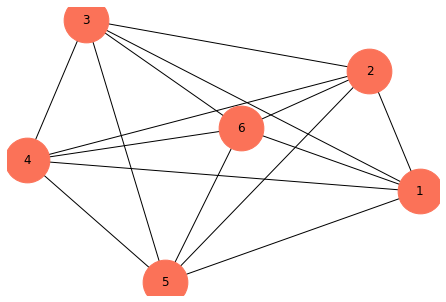

In [4]:
graph = nx.Graph() 
graph.add_weighted_edges_from(distances) 

nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

In [5]:
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) 
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [6]:
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
        
    return sum(edges)

In [7]:
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    
    return arrV

In [8]:
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    
    return arrV

In [9]:
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneRaplacement(V, z)
    return V

In [10]:
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) 
    arrSum = [sumLength] 
    
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) 
        newS = routeLength(newV, distances) 
        arrSum.append(newS)
        deltaS = newS - sumLength 
        
        if deltaS > 0:
            p = probability(deltaS, T) 
            
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        
        T = reductTemp(T) 
    
    return V, arrSum

In [11]:
def drawRouteGraph(distances, bestRoute):
    newDistances = []

    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    
    graph = nx.Graph() 
    
    
    graph.add_weighted_edges_from(newDistances) 

    nx.draw_kamada_kawai(graph, node_color = '#e1eb26', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 2, 5, 4, 3, 6, 1]
Длина лучшего выбранного маршрута: 139
Длины всех рассмотренных маршрутов: [177, 148, 157, 139, 154]


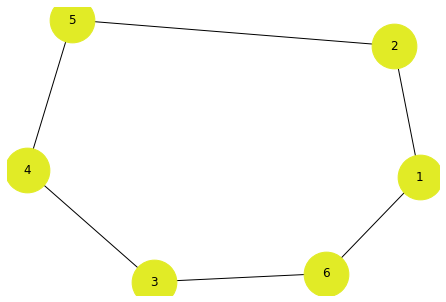

In [12]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) 